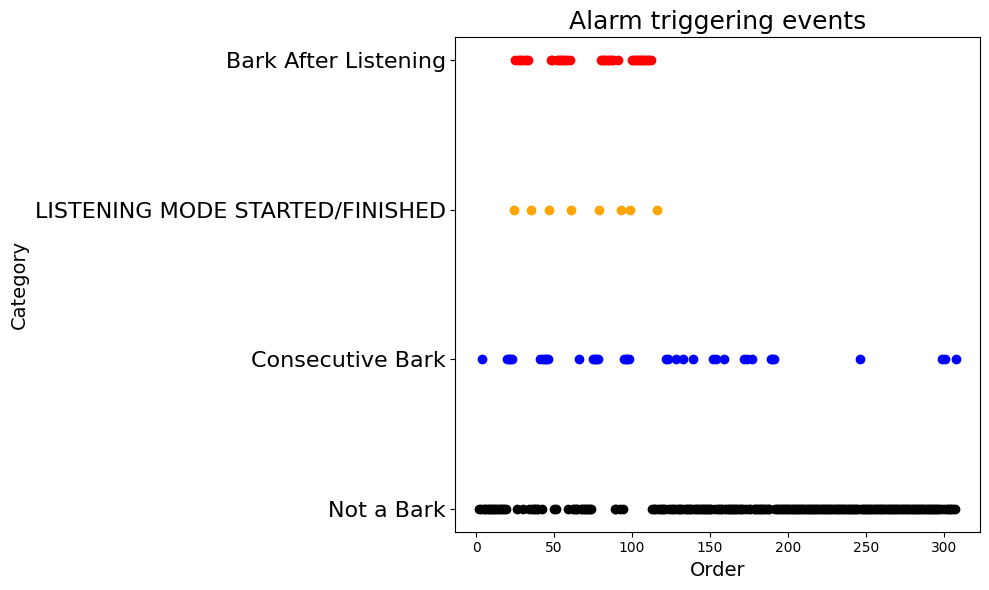

,Category,Order
1,Not a Bark,2
2,Not a Bark,3
3,Consecutive Bark,4
4,Not a Bark,5
5,Not a Bark,6
...,...,...
303,Not a Bark,304
304,Not a Bark,305
305,Not a Bark,306
306,Not a Bark,307


In [1]:
import pandas as pd
# %matplotlib widget
import matplotlib.pyplot as plt
import re


def plot_sequential_categories(file_path, encoding='latin-1', show_lines=False):
    """
    Esta función lee un archivo de texto, extrae las categorías que siguen a '|||',
    y las grafica secuencialmente con los puntos conectados y colores específicos.
    
    Parámetros:
    - file_path: str, la ruta del archivo de texto.
    - encoding: str, la codificación del archivo de texto. Por defecto es 'latin-1'.
    - show_lines: bool, determina si se deben mostrar o no las líneas que conectan los puntos. Por defecto es True.
    
    Devuelve:
    - df: DataFrame, un DataFrame que contiene las categorías y su orden.
    """
    
    # Leer el contenido del archivo
    with open(file_path, 'r', encoding=encoding) as file:
        content = file.read()
    
    # Expresión regular para extraer los datos después de '|||'
    pattern = re.compile(r'\|\|\| (.*)')
    
    # Encontrar todas las coincidencias
    matches = pattern.findall(content)
    
    # Crear un DataFrame con las coincidencias
    df = pd.DataFrame(matches, columns=['Category'])
    
    # Filtrar la categoría "ANALISIS"
    df = df[df['Category'] != 'Análisis']
    
    # Añadir un orden secuencial
    df['Order'] = df.index + 1
    
    # Ajustar las categorías "ESCUCHA ACTIVA DESACTIVADA" e "INICIADA" a "MODO ESCUCHA INICIADA/FINALIZADA"
    df['Category'] = df['Category'].replace({
        'ESCUCHA ACTIVA DESACTIVADA': 'MODO ESCUCHA INICIADA/FINALIZADA',
        'ESCUCHA ACTIVA INICIADA': 'MODO ESCUCHA INICIADA/FINALIZADA'
    })
    
    # Diccionario para traducir las categorías de español a inglés
    translation_dict = {
        'No es ladrido': 'Not a Bark',
        'ladrido seguido': 'Consecutive Bark',
        'MODO ESCUCHA INICIADA/FINALIZADA': 'LISTENING MODE STARTED/FINISHED',
        'ladrido despues de escucha': 'Bark After Listening'
    }
    
    # Reemplazar las categorías en español por inglés
    df['Category'] = df['Category'].replace(translation_dict)
    
    # Invertir el orden de las categorías para el gráfico
    ordered_categories = ['Not a Bark', 'Consecutive Bark', 'LISTENING MODE STARTED/FINISHED', 'Bark After Listening']
    df['Category'] = pd.Categorical(df['Category'], categories=ordered_categories, ordered=True)
    
    # Definir colores para cada categoría
    category_colors = {
        'Bark After Listening': 'red',
        'LISTENING MODE STARTED/FINISHED': 'orange',
        'Consecutive Bark': 'blue',
        'Not a Bark': 'black'
    }
    
    # Mantener las categorías únicas para el gráfico
    unique_categories = df['Category'].cat.categories

    # Configurar tamaño del texto
    font_settings = {'size': 16}  # Ajusta este valor para cambiar el tamaño del texto

    # Graficar las categorías secuenciales con puntos conectados
    plt.figure(figsize=(10, 6))  # Tamaño más pequeño del gráfico
    prev_order = None
    prev_index = None
    
    for i, row in df.iterrows():
        # Asignar color basado en la categoría
        color = category_colors.get(row['Category'], 'black')
        
        # Encontrar el índice ajustado de la categoría
        y_value = list(unique_categories).index(row['Category'])
        
        # Graficar el punto
        plt.plot(row['Order'], y_value, marker='o', color=color)
        
        # Conectar los puntos con una línea solo si show_lines es True
        if show_lines and prev_order is not None:
            plt.plot([prev_order, row['Order']], [prev_index, y_value], color=color)
        
        # Actualizar el anterior orden e índice
        prev_order = row['Order']
        prev_index = y_value
    
    # Configurar las etiquetas del eje Y
    plt.yticks(ticks=range(len(unique_categories)), labels=unique_categories, **font_settings)
    plt.xlabel('Order', fontsize=14)
    plt.ylabel('Category', fontsize=14)
    plt.title('Alarm triggering events', fontsize=18)
    plt.tight_layout()
    plt.show()
    
    return df


# Usage example
file_path_latest = 'resultados_experimentos_tlaxcala/resultados/experimento_3_r_2_margot.txt'
# df_latest = plot_category_frequencies(file_path_latest)
plot_sequential_categories(file_path_latest, encoding='latin-1')
